# Example

This example shows part of the basic functionality of the module.

If you prefer JupyterLab's interface over Jupyter Notebook's, replace `notebooks`
with `lab/tree` in the URL.

First off, let's import the package:

In [1]:
using Scats

Let's set up an instance of the interface of the package to obtain access to its
capabilities.

In [2]:
s = Scats.API();

We don't have a time series yet, but we can use the built-in generator to get one. To do
this, we should specify time series generator parameters using a text file, but we do not
have one either. Fortunately, the package provides a template for each built-in structure,
so we'll use one of them.

In [3]:
# Create a temporary file for generator parameters
file, _ = mktemp()

# Fill this file with the generator settings template
s.Gen.example(file)

# Finally, read these parameters into the appropriate structure
s.Gen(file)

Let's generate a time series:

In [4]:
# Call the generation
s.gen!()

Done. The time series is now contained in the instance of Input' structure.

Let's render it for validation. But first, we need a package for that.

In [5]:
using Pkg
Pkg.add("PyPlot")

And now let's import it:

In [6]:
using PyPlot

It's optional, but it's never harmful to make graphs prettier:

In [7]:
# Get access to rcParams
rcP = PyPlot.PyDict(PyPlot.matplotlib."rcParams")

# Set DPI
rcP["savefig.dpi"] = 300
rcP["figure.dpi"] = 300

# Activate TeX support
rcP["text.usetex"] = true

# Activate languages support
rcP["text.latex.preamble"] = raw"\usepackage[main=english]{babel}"

# Switch to Computer Modern font set
rcP["mathtext.fontset"] = "cm"

# Set font sizes
rcP["font.size"] = 18
rcP["legend.fontsize"] = 12;

Now let's get a plot:

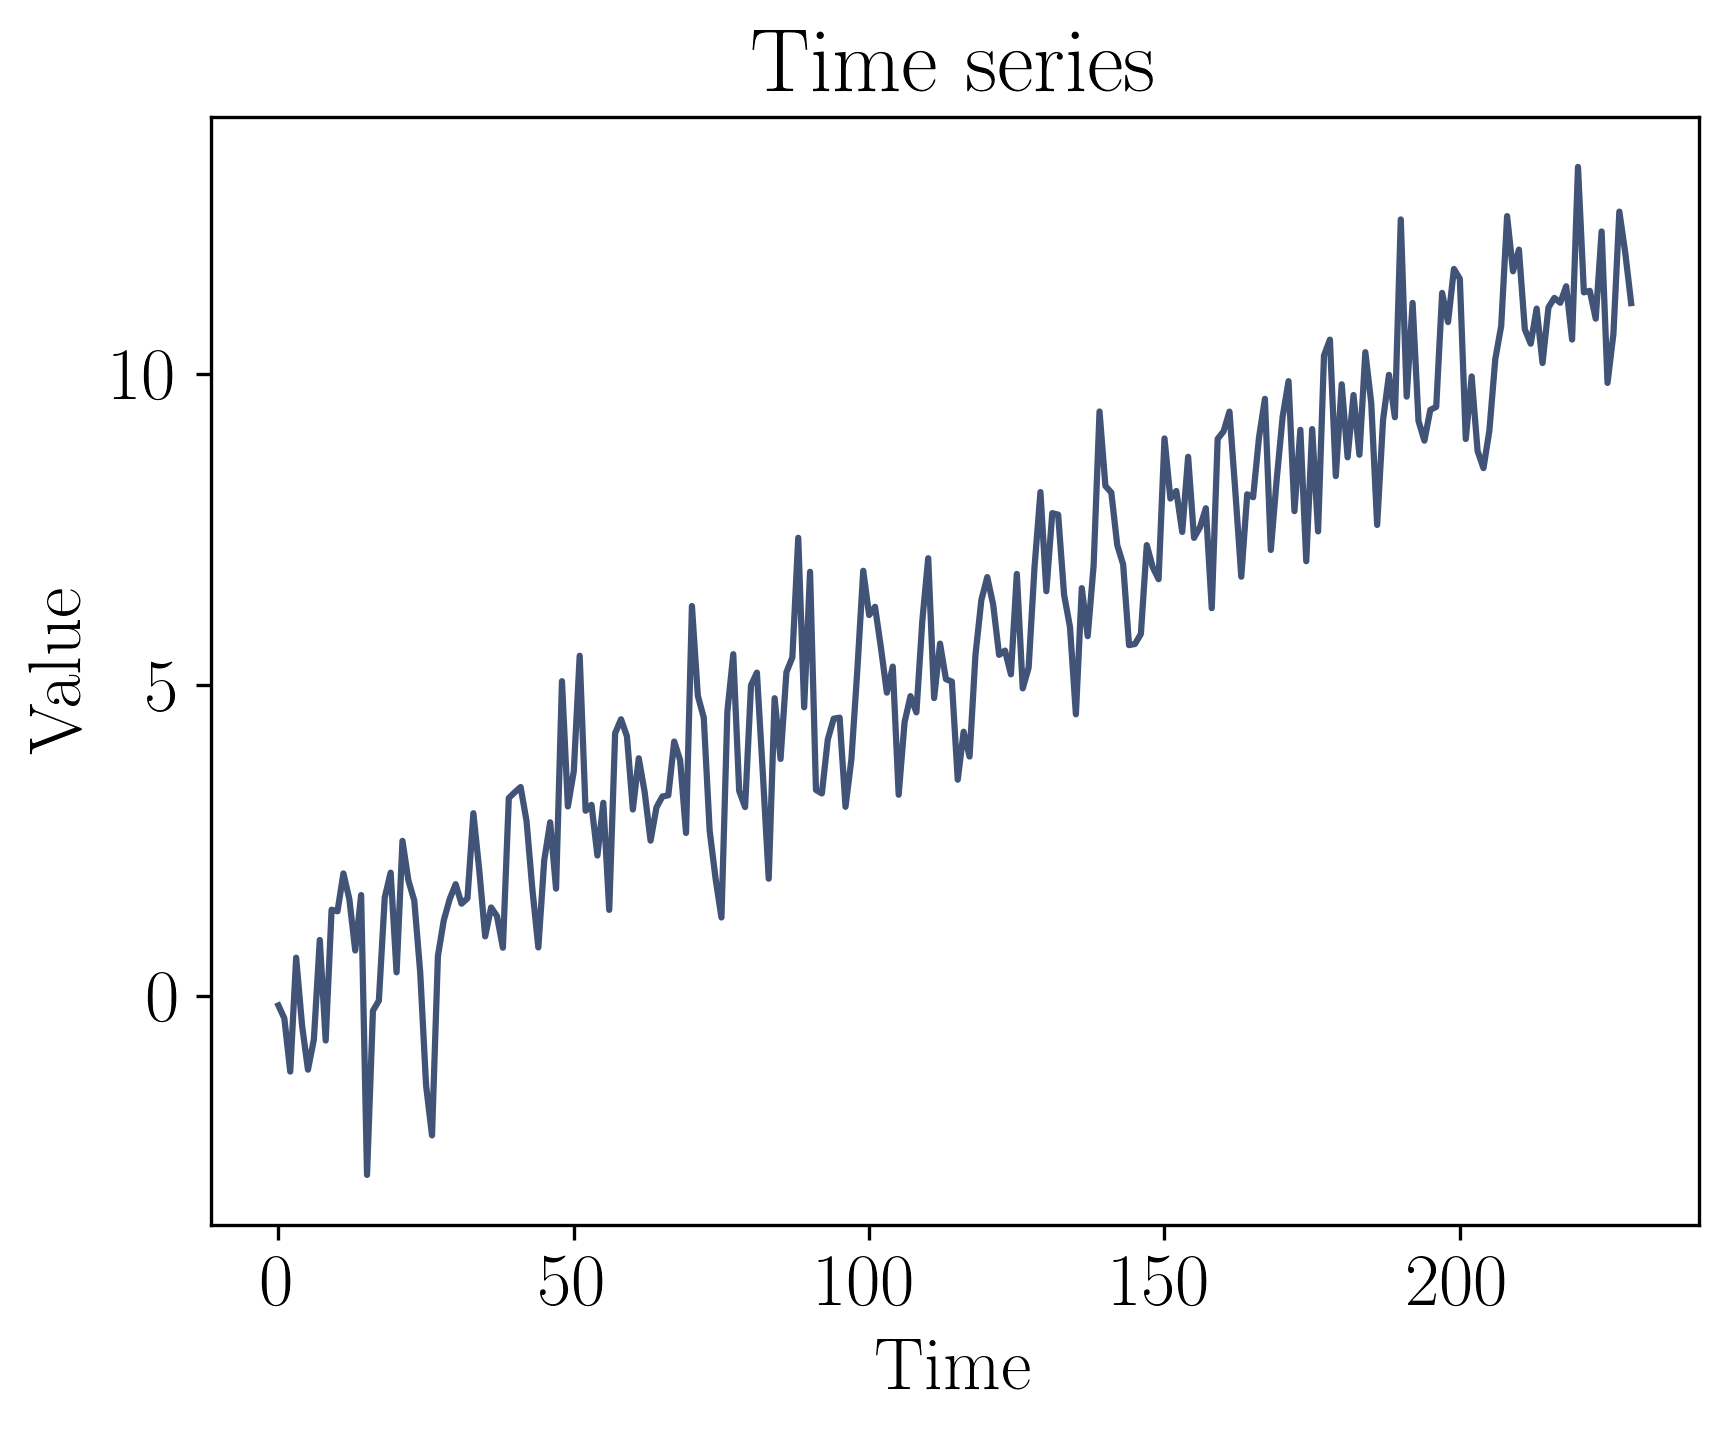

In [8]:
# Create a plot
plot(s.Input.t, s.Input.x, color = "#425378")

# Add a title
title(raw"\textrm{Time series}")

# Add labels
xlabel(raw"\textrm{Time}")
ylabel(raw"\textrm{Value}")

# Create a directory for figures
!isdir("figures") && mkdir("figures")

# Save the figure
savefig("figures/input.pdf", bbox_inches = "tight")

In [9]:
# Close the figure
close()

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*